# 1 Slotted-ALOHA Capacity

The idealized slotted aloha model divides time into several slots, each equal to the packet transmission time.
All nodes are perfectly synchronized and transmit at the start of each slot.
The transmission probability for each user in each slot is a value p. For any time slot, three scenarios are possible:

1. More than one node transmits, resulting in a collision slot. The receiver cannot decode them correctly.


2. Only one node transmits and the receiver can decode it correctly. 


3. No node transmits in the current slot.


## 1.1
Write a function that takes three parameters: the number of users, the number of time slots, and the probability p that a user will transmit in a slot.
The function should return the fraction of successful slots (slots where only one user transmitted) over the total number of slots.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random


In [2]:
def simulate_aloha(n_users, n_timeslots, prob):
    # Initialize the number of successful transmissions
    successful_transmissions = 0

    # For each slot
    for _ in range(n_timeslots):
        # Determine the number of transmissions
        num_transmissions = np.random.binomial(n_users, prob)

        # If there is exactly one transmission, it is successful
        if num_transmissions == 1:
            successful_transmissions += 1

    # Return the fraction of successful transmissions
    return successful_transmissions / n_timeslots

## 1.2 Verifying Slotted ALOHA Capacity
Run your simulation over 1000 values of p between 0 and 1 with n = 10 users and T = 10000 timeslots. Plot the timeslot success ratio as a function of p. Verify that the resulting plot matches the theoretical curve.


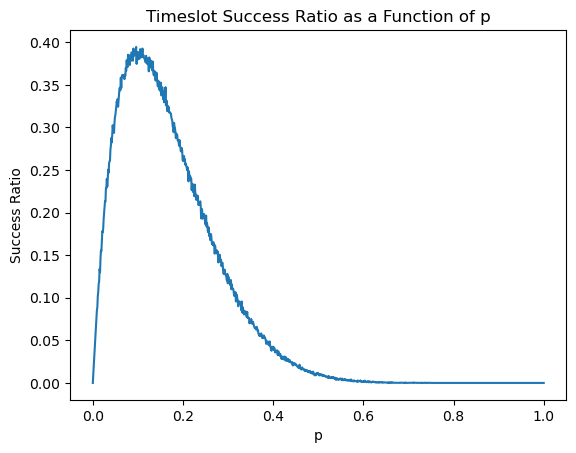

In [3]:
num_users = 10
num_slots = 10000
p_values = np.linspace(0, 1, 1000)
success_ratios = []

for p in p_values:
    success_ratio = simulate_aloha(num_users, num_slots, p)
    success_ratios.append(success_ratio)

plt.plot(p_values, success_ratios)
plt.xlabel('p')
plt.ylabel('Success Ratio')
plt.title('Timeslot Success Ratio as a Function of p')
plt.show()


Since each sender sends data with a probability of p or does not send data with a probability of p-1, our distribution is binomial.So, we can define the probability distribution function of sending data in each time slot as follows : 


$f_X(x) = {k \choose n} p^k (1-p)^{n-k} $

In this problem and according to the form of the question and the demands, k must be 1 and n=10 is specified in the question form and our function becomes a function of p which can be seen as follows :

$f(p) = {1 \choose 10} p (1-p)^{10 - 1} = 10 p (1-p)^{9}$


and we can find the optimum p for this problem : 


$\frac{df}{dp} = 0 \Longrightarrow p = 0.1$

As we guessed from the graph, this function has a peak around the extremum point, and our theoretical calculations agree with the simulation results.

# 2 MAC protocol: Preamble
A preamble is a waveform sent at the beginning of a packet that is used to indicate the start of a packet. The preamble waveform is agreed to ahead-of-time, so the signal carries no data. Receivers will listen for the preamble, and when it’s detected the receivers will start to demod- ulate the rest of the packet. Preambles can also be used to synchronize multiple clients for MAC protocols that require synchronization. In this part, we will explore how to detect and synchronize to a preamble. Both detection and synchronization can be done using a correlation. A correlation of two discrete signals x and y is an infinite-length discrete signal which is defined as : 
$$
(x*y)[k] = \sum_{n = - \infty}^{n =\infty} x^{*}[n] \cdot y[n+k]
$$

In other words, at each index k, you take conjugate of the first signal x and offset the second signal y by k indices and then sum the resulting two signals. Intuitively, the correlation measures the similarity of two signals for every offset of the one signal relative to the other. For signals with finite length, the correlation is zero for sufficiently large |k|, so often we’ll consider the correlation to be finite as well.

So how do we use the correlation to detect a preamble? Let x be the preamble signal, and let y be the signal that the receiver receives. For now, we’ll let y be finite length. If the preamble is not received, then we can model y as a random signal, and the correlation between x and y will also be random. However, if the receiver did receive the preamble in the signal y, then we can model y as x with some offset plus noise. The correlation between x and y will then have a large amplitude at the time in y when the preamble started. So if we look for large peaks in the correlation we can detect and then also synchronize to a given preamble.

# Correlation and Preambles
We will explore how nodes can listen for a specific preamble to achieve time synchronization.

### Problem 2.1: Autocorrelation 
The autocorrelation of a signal $x$ is the correlation of $x$ with itself. For a uniform random signal $x$ think about what the autocorrelation would look like.

- **Plot the signal and its autocorrelation. Use `numpy.correlate` with `mode='full'`, and plot the absolute value of the autocorrelation.**

In [4]:
X_len = 1000
X = np.random.random(X_len) + 1j * np.random.random(X_len)

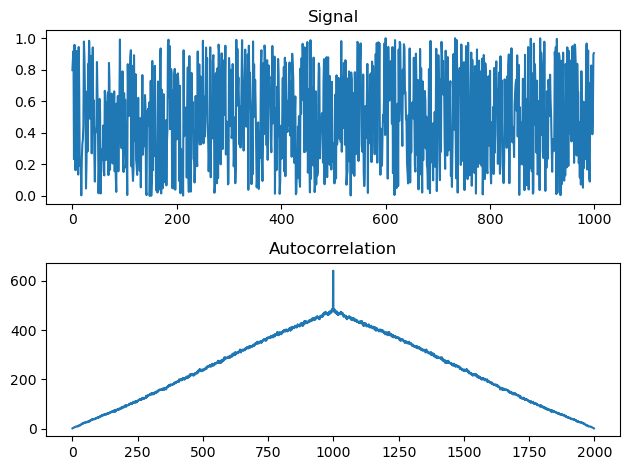

In [5]:
autocorr = np.correlate(X, X, mode='full')

# Plot the signal
plt.subplot(2, 1, 1)
plt.plot(np.real(X))
plt.title('Signal')

# Plot the autocorrelation
plt.subplot(2, 1, 2)
plt.plot(np.abs(autocorr))
plt.title('Autocorrelation')

# Display the plots
plt.tight_layout()
plt.show()


### Problem 2.2: Preamble detection using correlation
Implement preamble detection and synchronization using the correlation.

- **Fill in the `detect_preamble` function below. The function should take two signals and return `None` if the preamble is not found, otherwise it should return the index where the preamble starts.**

In [6]:
# Compare the correlation magnitude against this value to determine whether there is a preamble or not
threshold = 100
def detect_preamble(preamble, signal , threshold = threshold):
    correlation = np.correlate(signal, preamble, mode='valid')

    # Find the index of the maximum correlation value
    max_index = np.argmax(correlation)

    plt.plot(np.abs(correlation))
    plt.title('Autocorrelation')
    plt.show()

    # If the maximum correlation value is above the threshold, the preamble is present
    if correlation[max_index] > threshold:
        print("Preamble detected at index", max_index ,"\n")
        return max_index
    else:
        print("Preamble not detected\n")
        return None
    

        
    

Auto-correlation of signalA:


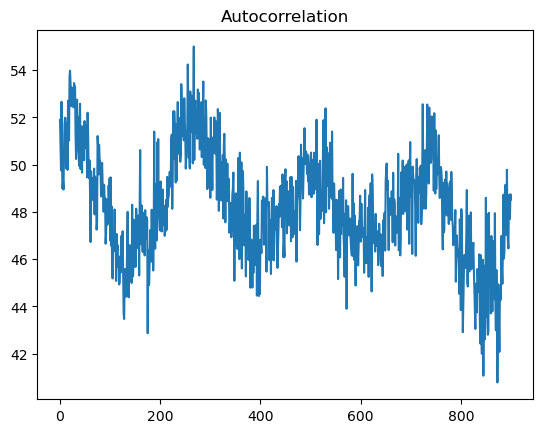

Preamble not detected

Auto-correlation of signalB:


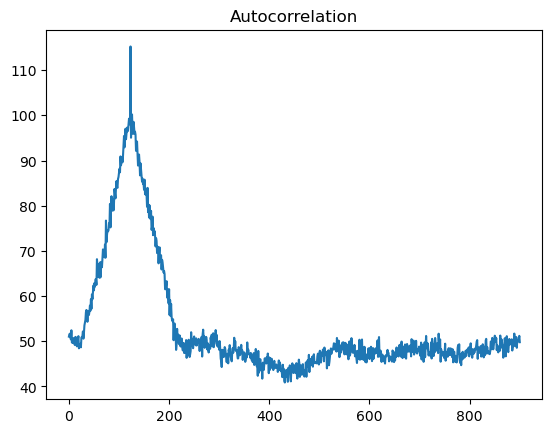

Preamble detected at index 123 



In [7]:
# This cell will test your implementation of `detect_preamble`
preamble_length = 100
signal_length = 1000
preamble = (np.random.random(preamble_length) + 1j * np.random.random(preamble_length))
signalA = np.random.random(signal_length) + 1j * np.random.random(signal_length)
signalB = np.random.random(signal_length) + 1j * np.random.random(signal_length)
preamble_start_idx = 123
signalB[preamble_start_idx:preamble_start_idx + preamble_length] += preamble

print("Auto-correlation of signalA:")
np.testing.assert_equal(detect_preamble(preamble, signalA), None)


print("Auto-correlation of signalB:")
np.testing.assert_equal(detect_preamble(preamble, signalB), preamble_start_idx)

# 3 GPS signal
PRN stands for PseudoRandom Noise. It is a binary sequence of length 16 bits that is included in the data stream of a GPS satellite signal. The purpose of this sequence is to ensure that the data signal is spread across the bandwidth of the satellite signal, preventing interference between different signals.


## 3.1
Generate a sequence of codes with size 16 (PRN). (Use random.seed to get the same sequence of pseudorandom numbers each time you run the program.)

In [8]:
# Set the seed
random.seed(1)

# Generate a sequence of 16 pseudorandom numbers
prn_sequence = [random.randint(0, 1) for _ in range(16)]

length = len(prn_sequence)
print(prn_sequence)

[0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1]


## 3.2
The transmited GPS signal uses binary phase shift keying, signal changed by shift π while it turns from 1 to -1, which can be done by multiplying the carefully constructed PRN above with the carrier! This works because sin(x − π) = − sin(x), in other words it’s exactly a 180 degree phase shift. We should see this as blips in sine wave every time our data changes from 1 to 0 or visa-versa. An example is shown in figure 1.
Generate a Binary Phase Shift Keying (BPSK) modulation scheme and plot the PRN sequence and the signal over time. An example is shown in figure 2.


<div style="text-align: center;">
    <img src="prn_sequence.png" alt="PRN Sequence" width="500">
    <br>
    <img src="bpsk_signal.png" alt="BPSK Signal" width="500">
</div>



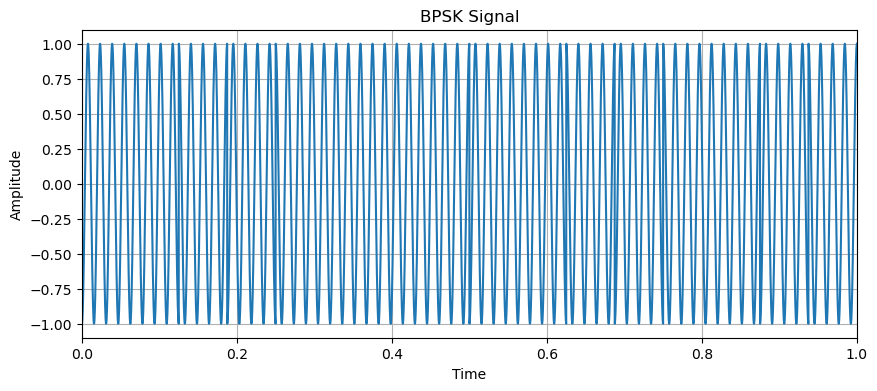

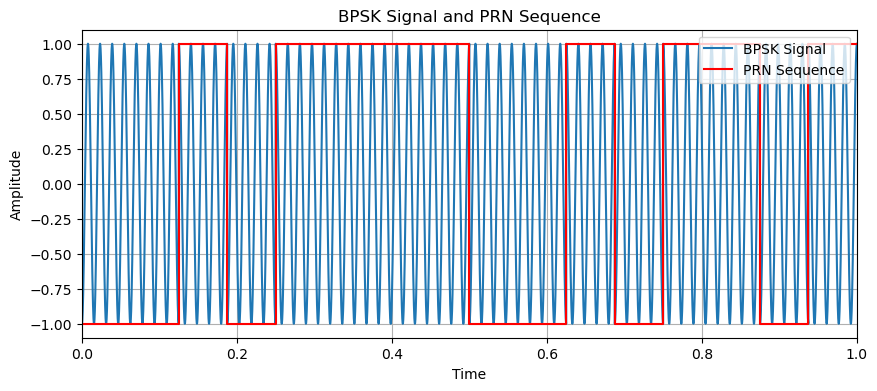

[0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1]


In [27]:
time = np.arange(0, 1 , 0.001)
t = np.arange(0, 1, 0.001/length)
t_bpsk = np.arange(0, 1, 0.001/16)
t_prn = np.arange(0 , 1 , 0.001/length)
f=4

def bpsk(bit_sequence , time , f=4):
    # Map the bit sequence to phase values
    # 0 -> 0 degrees, 1 -> 180 degrees
    phase_sequence = [np.pi if bit == 0 else 0 for bit in bit_sequence]

    # Generate the BPSK signal
    bpsk_signal = []
    for phase in phase_sequence:
        bpsk_signal.extend(np.cos(2 * np.pi * f * time + phase))

    return bpsk_signal


bpsk_signal = bpsk(prn_sequence , time)

plt.figure(figsize=(10, 4))
plt.plot(t_bpsk , bpsk_signal)  # Plotting the first 1000 points for clarity
plt.title('BPSK Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.xlim(0,1)
plt.grid(True)
plt.show()

# Generate time sequence for prn_sequence
prn_sequence_modified = [-1 if bit == 0 else 1 for bit in prn_sequence]

last_value = prn_sequence[-1]
additional_values = [last_value] * int(0.0625 * len(prn_sequence))
prn_sequence_modified_extended = np.concatenate((prn_sequence_modified, additional_values))

t_prn_extended = np.linspace(0, 1, num=len(prn_sequence_modified_extended))



plt.figure(figsize=(10, 4))

# Plot the BPSK signal
plt.plot(t_bpsk, bpsk_signal, label='BPSK Signal')

# Plot the PRN sequence
plt.step(t_prn_extended, prn_sequence_modified_extended , 'r', where='post', label='PRN Sequence')


plt.title('BPSK Signal and PRN Sequence')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.xlim(0,1)
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

print(prn_sequence)

## 3.3
Check the concideness between codes and graph. An example is shown in figure 3

<div style="text-align: center;">
    <img src="concideness.png" alt="concideness" width="500">
</div>



In [33]:
# Generate a reference signal
reference_signal = np.cos(2 * np.pi * f * time)
prn_sequence_reconstructed = []
for i in range(16) : 
    sample_ith = bpsk_signal[i*len(time):(i+1)*len(time)]
    
    bpsk_signal_demodulated_ith = np.sum(sample_ith * reference_signal) / len(time)
    if bpsk_signal_demodulated_ith > 0 : 
        bpsk_signal_demodulated_ith = 1
    else :
        bpsk_signal_demodulated_ith = 0

    prn_sequence_reconstructed.append(bpsk_signal_demodulated_ith)
    
print("reconstructed prn is : ", prn_sequence_reconstructed)
print("original prn is : ", prn_sequence)
print("Checking the equality of original and reconstructed : " , prn_sequence_reconstructed == prn_sequence)
    


reconstructed prn is :  [0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1]
original prn is :  [0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1]
Checking the equality of original and reconstructed :  True
